<P> <B> <font color=red size="4"> 6.DBSCAN Clustering</Font></B> </P>

<b><font color=green size="4">DBSCAN Clustering on the Iris Dataset:</font></b>

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. It groups points that are closely packed together and marks points in low-density regions as noise. DBSCAN doesn't require the number of clusters to be specified, making it useful for datasets with varying densities and arbitrary cluster shapes.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ground truth


<b><font color=green size="4">Key Parameters in DBSCAN:</font></b>

<b>eps:</b><ol>
        <li>Maximum distance between two samples for them to be considered neighbors.</li>
      <li>  A smaller eps identifies tighter clusters but may lead to more noise.</li></ol>
    <b>min_samples:</b><ol>
        <li>Minimum number of points required to form a dense region (core point).</li></ol>
    <b>metric:</b><ol>
        <li>Defines how distance is measured (default is 'euclidean').</li></ol>

In [3]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples if needed
y_dbscan = dbscan.fit_predict(X)

In [4]:
# Performance Metrics
silhouette_avg = silhouette_score(X, y_dbscan)
calinski_harabasz = calinski_harabasz_score(X, y_dbscan)
davies_bouldin = davies_bouldin_score(X, y_dbscan)
adjusted_rand = adjusted_rand_score(y, y_dbscan)
normalized_mutual_info = normalized_mutual_info_score(y, y_dbscan)
homogeneity = homogeneity_score(y, y_dbscan)
completeness = completeness_score(y, y_dbscan)
v_measure = v_measure_score(y, y_dbscan)


In [5]:
# Display the results
results = pd.DataFrame({
    "Metric": [
        "Silhouette Coefficient",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index",
        "Adjusted Rand Index",
        "Normalized Mutual Information",
        "Homogeneity",
        "Completeness",
        "V-Measure"
    ],
    "Score": [
        silhouette_avg,
        davies_bouldin,
        calinski_harabasz,
        adjusted_rand,
        normalized_mutual_info,
        homogeneity,
        completeness,
        v_measure
    ]
})

print(results)

                          Metric       Score
0         Silhouette Coefficient    0.486034
1           Davies-Bouldin Index    7.222448
2        Calinski-Harabasz Index  220.297515
3            Adjusted Rand Index    0.520619
4  Normalized Mutual Information    0.604416
5                    Homogeneity    0.559946
6                   Completeness    0.656558
7                      V-Measure    0.604416


In [6]:
# Reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


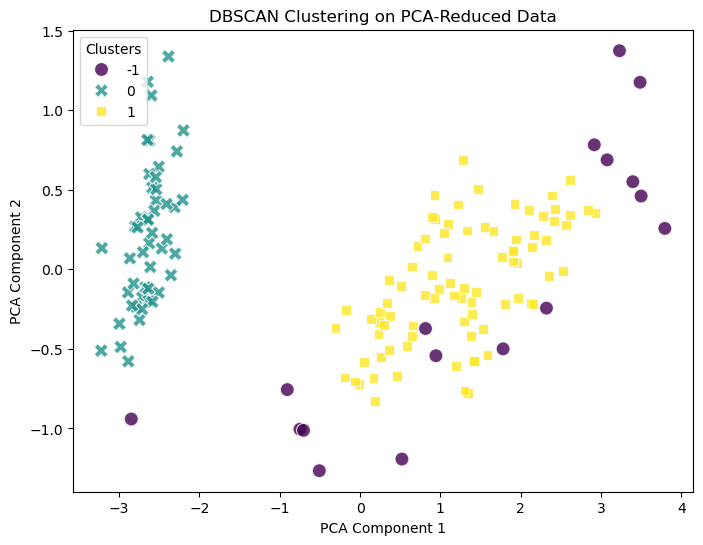

In [8]:
# Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_dbscan, palette='viridis', style=y_dbscan, s=100, alpha=0.8
)
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters')
plt.show()

<b><font color=green size="4">Tuning Parameters:</font></b>
    
    To find the optimal values for eps and min_samples, you can experiment with a grid search or plot a k-distance graph


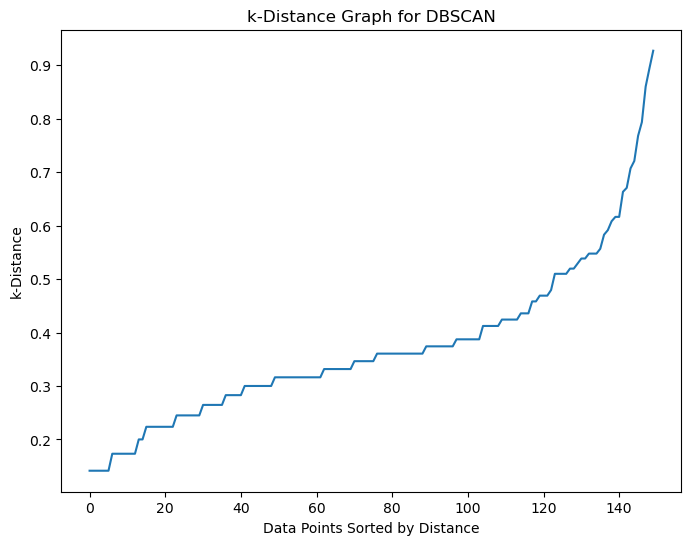

In [9]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Calculate k-distances
k = 4  # min_samples - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances for k-distance graph
distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('k-Distance Graph for DBSCAN')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('k-Distance')
plt.show()


<b>Strengths of DBSCAN:</b>
<ol>
    <li>Detects clusters of arbitrary shapes.</li>
    <li>Identifies outliers (noise).</li>
    <li>No need to predefine the number of clusters.</li></ol>

<b>Limitations:</b>
<ol>
<li>Sensitive to eps and min_samples.</li>
    <li>Struggles with datasets of varying density.</li>

<b>Advanced DBSCAN Analysis on the Iris Dataset</b>

Let's extend the DBSCAN analysis by focusing on the following aspects:
<ol>
    <li>Identifying Noise Points: Points classified as noise (label -1).</li>
    <li>Visualizing Clusters with Noise.</li>
    <li>Experimenting with Different Parameters (eps and min_samples).</li>
    <li>Comparing Results Across Configurations.</li></ol>

<b><font color=green size="4">1.DBSCAN with Noise Points:</font></b>

Estimated number of clusters: 2
Number of noise points: 17


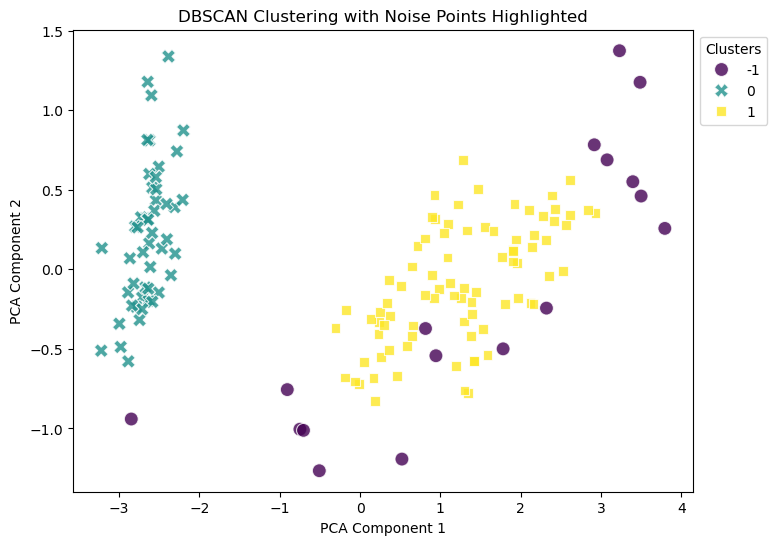

In [12]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Default parameters
y_dbscan = dbscan.fit_predict(X)

# Count clusters and noise points
unique_labels = set(y_dbscan)
n_clusters = len([label for label in unique_labels if label != -1])
n_noise = list(y_dbscan).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Reduce dimensions for visualization
X_pca = PCA(n_components=2, random_state=42).fit_transform(X)

# Visualization with noise points
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_dbscan, palette='viridis', style=y_dbscan, s=100, alpha=0.8
)
plt.title('DBSCAN Clustering with Noise Points Highlighted')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters', loc='best', bbox_to_anchor=(1, 1))
plt.show()


<b><font color=green size="4">2.Experiment with Parameters:</font></b>

In [13]:
# Test different configurations for DBSCAN
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters = len(set(labels) - {-1})
        n_noise = list(labels).count(-1)
        silhouette = silhouette_score(X, labels) if n_clusters > 1 else None
        results.append((eps, min_samples, n_clusters, n_noise, silhouette))

# Display results
print(f"{'Eps':<10} {'Min_Samples':<15} {'Clusters':<10} {'Noise Points':<15} {'Silhouette Score':<20}")
for eps, min_samples, n_clusters, n_noise, silhouette in results:
    print(f"{eps:<10} {min_samples:<15} {n_clusters:<10} {n_noise:<15} {silhouette if silhouette else 'N/A':<20}")


Eps        Min_Samples     Clusters   Noise Points    Silhouette Score    
0.3        3               9          67              0.031696721278816495
0.3        5               3          96              -0.052064296410955904
0.3        10              2          120             0.3077502804182201  
0.5        3               4          10              0.34673727351549793 
0.5        5               2          17              0.48603419703456857 
0.5        10              2          30              0.4226852735832703  
0.7        3               2          3               0.5018335620464311  
0.7        5               2          3               0.5018335620464311  
0.7        10              2          8               0.5385919451236434  
1.0        3               2          0               0.6867350732769776  
1.0        5               2          0               0.6867350732769776  
1.0        10              2          0               0.6867350732769776  


<b><font color=green size="4">3. Best Configuration:</font></b>
        
        Based on the results, choose the best combination of eps and min_samples.

Silhouette Score: 0.486
Number of clusters: 2
Noise points: 17


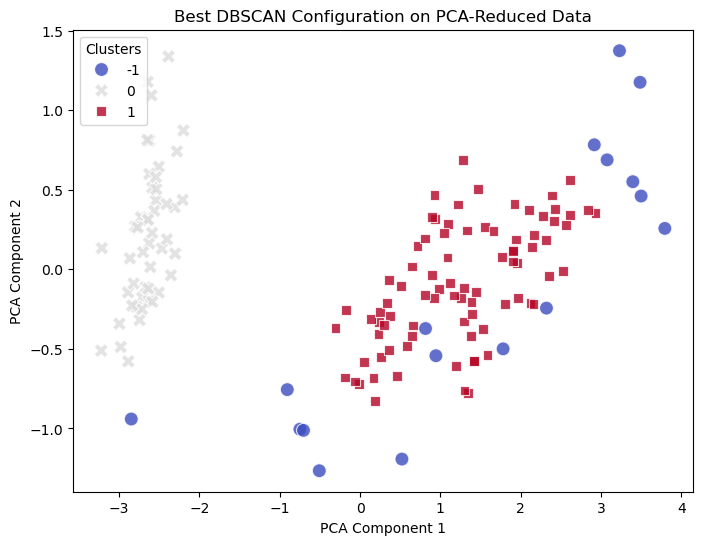

In [14]:
# Apply DBSCAN with the best parameters
best_eps = 0.5  # Replace with chosen value
best_min_samples = 5  # Replace with chosen value
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_dbscan_best = dbscan_best.fit_predict(X)

# Evaluate and visualize
print(f"Silhouette Score: {silhouette_score(X, y_dbscan_best):.3f}")
print(f"Number of clusters: {len(set(y_dbscan_best) - {-1})}")
print(f"Noise points: {list(y_dbscan_best).count(-1)}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_dbscan_best, palette='coolwarm', style=y_dbscan_best, s=100, alpha=0.8
)
plt.title('Best DBSCAN Configuration on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters')
plt.show()


<b><font color=green size="4">Key Insights:</font></b>

<b>Effect of Parameters:</b><ol>
        <li>Smaller eps values result in more noise points and smaller clusters.</li>
        <li>Larger min_samples require denser clusters, increasing noise points.</li></ol>
    <b>Identifying the Best Configuration:</b><ol>
        <li>Use the silhouette score or the number of clusters as criteria.</li>
        <li>Consider the problem context—noise might represent meaningful anomalies.</li></ol>
    <b>Visualization:</b><ol>
        <li>Highlight noise points to understand their distribution.</li>
        <li>Visualize results on reduced dimensions using PCA.</li></ol>